In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import datetime
%matplotlib inline

In [5]:
qvi_data=pd.read_csv("QVI_data.csv")    #   Reading the CSV file into a pandas.DataFrame.
qvi_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,Tostitos,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,Doritos,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos,YOUNG SINGLES/COUPLES,Premium


In [7]:
qvi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              246740 non-null  object 
 1   STORE_NBR         246740 non-null  int64  
 2   LYLTY_CARD_NBR    246740 non-null  int64  
 3   TXN_ID            246740 non-null  int64  
 4   PROD_NBR          246740 non-null  int64  
 5   PROD_NAME         246740 non-null  object 
 6   PROD_QTY          246740 non-null  int64  
 7   TOT_SALES         246740 non-null  float64
 8   PACK_SIZE         240676 non-null  float64
 9   BRAND             246740 non-null  object 
 10  LIFESTAGE         246740 non-null  object 
 11  PREMIUM_CUSTOMER  246740 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 22.6+ MB


In [9]:
qvi_data.isnull().sum()

DATE                   0
STORE_NBR              0
LYLTY_CARD_NBR         0
TXN_ID                 0
PROD_NBR               0
PROD_NAME              0
PROD_QTY               0
TOT_SALES              0
PACK_SIZE           6064
BRAND                  0
LIFESTAGE              0
PREMIUM_CUSTOMER       0
dtype: int64

In [11]:
qvi_data["YEAR_MONTH"]=pd.to_datetime(qvi_data["DATE"]).dt.to_period("M")   #   Storing the year and month of the recorded duration in a separate column.
qvi_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium,2018-10
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget,2019-05
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget,2019-05
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget,2018-08
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle,YOUNG SINGLES/COUPLES,Premium,2019-03
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,Tostitos,YOUNG SINGLES/COUPLES,Premium,2018-08
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,Doritos,YOUNG SINGLES/COUPLES,Premium,2018-11
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos,YOUNG SINGLES/COUPLES,Premium,2018-12


In [13]:
total_sales=qvi_data.groupby(["STORE_NBR", "YEAR_MONTH"])["TOT_SALES"].sum()    #   Grouping the pandas.DataFrame by the STORE_NBR and YEAR_MONTH column, and summing up the total sales for them.
total_sales=total_sales.to_frame()  #   Converting the pandas.Series to a pandas.DataFrame.
total_sales

TOT_SALES
STORE_NBR YEAR_MONTH           
1         2018-07         188.9
          2018-08         168.4
          2018-09         268.1
          2018-10         175.4
          2018-11         184.8
...                         ...
272       2019-02         385.3
          2019-03         421.9
          2019-04         445.1
          2019-05         314.6
          2019-06         301.9

[3165 rows x 1 columns]

In [15]:
total_customers=qvi_data.groupby(["STORE_NBR", "YEAR_MONTH"])["LYLTY_CARD_NBR"].nunique()   #   Grouping the pandas.DataFrame by the STORE_NBR and YEAR_MONTH column, and counting the unique number of customers for them.
total_customers=total_customers.to_frame()  #   Converting the pandas.Series to a pandas.DataFrame.
total_customers

LYLTY_CARD_NBR
STORE_NBR YEAR_MONTH                
1         2018-07                 47
          2018-08                 41
          2018-09                 57
          2018-10                 39
          2018-11                 44
...                              ...
272       2019-02                 44
          2019-03                 48
          2019-04                 54
          2019-05                 34
          2019-06                 33

[3165 rows x 1 columns]

In [17]:
transactions_per_customer=qvi_data.groupby(["STORE_NBR", "YEAR_MONTH"])["TXN_ID"].nunique()/qvi_data.groupby(["STORE_NBR", "YEAR_MONTH"])["LYLTY_CARD_NBR"].nunique()   #   Grouping the pandas.DataFrame by the STORE_NBR and YEAR_MONTH column, and counting the unique number of transactions per customer for them.
transactions_per_customer=transactions_per_customer.to_frame()  #   Converting the pandas.Series to a pandas.DataFrame.
transactions_per_customer

0
STORE_NBR YEAR_MONTH          
1         2018-07     1.042553
          2018-08     1.000000
          2018-09     1.035088
          2018-10     1.025641
          2018-11     1.022727
...                        ...
272       2019-02     1.068182
          2019-03     1.062500
          2019-04     1.018519
          2019-05     1.176471
          2019-06     1.090909

[3165 rows x 1 columns]

In [19]:
dataframe_list=[total_sales, total_customers, transactions_per_customer]    #   Creating a list of all the pandas.DataFrames.
dataframe=pd.concat(dataframe_list, axis=1) #   Concatenating all the pandas.DataFrames into one.
dataframe.columns=["TOT_SALES", "TOT_CUST", "TXN_PER_CUST"] #   Renaming the columns of the pandas.DataFrame.
dataframe

TOT_SALES  TOT_CUST  TXN_PER_CUST
STORE_NBR YEAR_MONTH                                   
1         2018-07         188.9        47      1.042553
          2018-08         168.4        41      1.000000
          2018-09         268.1        57      1.035088
          2018-10         175.4        39      1.025641
          2018-11         184.8        44      1.022727
...                         ...       ...           ...
272       2019-02         385.3        44      1.068182
          2019-03         421.9        48      1.062500
          2019-04         445.1        54      1.018519
          2019-05         314.6        34      1.176471
          2019-06         301.9        33      1.090909

[3165 rows x 3 columns]

In [21]:
dataframe.isnull().sum() 

TOT_SALES       0
TOT_CUST        0
TXN_PER_CUST    0
dtype: int64

In [23]:
recorded_stores=pd.pivot_table(qvi_data, index="STORE_NBR", columns="YEAR_MONTH", values="TXN_ID", aggfunc="count") #   Pivoting the pandas.DataFrame to get all the recorded transactions for each store during the entire duration.
recorded_stores

YEAR_MONTH,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
STORE_NBR,,,,,,,,,,,,
1,49.0,41.0,59.0,40.0,45.0,40.0,35.0,51.0,47.0,40.0,48.0,40.0
2,38.0,39.0,33.0,41.0,34.0,35.0,43.0,31.0,41.0,45.0,47.0,38.0
3,134.0,124.0,118.0,117.0,111.0,124.0,114.0,134.0,126.0,102.0,113.0,117.0
4,152.0,144.0,135.0,148.0,127.0,128.0,156.0,97.0,127.0,130.0,112.0,129.0
5,111.0,99.0,122.0,98.0,103.0,112.0,108.0,103.0,86.0,101.0,94.0,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...
268,50.0,50.0,30.0,46.0,46.0,39.0,35.0,36.0,44.0,45.0,48.0,38.0
269,131.0,127.0,117.0,142.0,125.0,119.0,133.0,123.0,117.0,129.0,117.0,114.0
270,124.0,143.0,115.0,104.0,121.0,140.0,146.0,116.0,137.0,122.0,119.0,114.0


In [25]:

recorded_stores.isnull().sum()

YEAR_MONTH
2018-07    7
2018-08    8
2018-09    7
2018-10    6
2018-11    7
2018-12    8
2019-01    8
2019-02    7
2019-03    6
2019-04    8
2019-05    8
2019-06    7
Freq: M, dtype: int64

In [27]:
unrecorded_stores=[]
for i in recorded_stores.index:
    if recorded_stores.loc[i].isnull().any():
        unrecorded_stores.append(i)
unrecorded_stores

[11, 31, 44, 76, 85, 92, 117, 177, 193, 206, 218, 252]

In [29]:
dataframe=dataframe.drop(unrecorded_stores, axis=0)
dataframe

TOT_SALES  TOT_CUST  TXN_PER_CUST
STORE_NBR YEAR_MONTH                                   
1         2018-07         188.9        47      1.042553
          2018-08         168.4        41      1.000000
          2018-09         268.1        57      1.035088
          2018-10         175.4        39      1.025641
          2018-11         184.8        44      1.022727
...                         ...       ...           ...
272       2019-02         385.3        44      1.068182
          2019-03         421.9        48      1.062500
          2019-04         445.1        54      1.018519
          2019-05         314.6        34      1.176471
          2019-06         301.9        33      1.090909

[3108 rows x 3 columns]

In [31]:
pre_trial_data=dataframe.loc[dataframe.index.get_level_values("YEAR_MONTH")<"2019-02"]  #   Extracting the pandas.DataFrame for the pre-trial duration.
pre_trial_data=pre_trial_data.reset_index()
pre_trial_data

,STORE_NBR,YEAR_MONTH,TOT_SALES,TOT_CUST,TXN_PER_CUST
0,1,2018-07,188.9,47,1.042553
1,1,2018-08,168.4,41,1.000000
2,1,2018-09,268.1,57,1.035088
3,1,2018-10,175.4,39,1.025641
4,1,2018-11,184.8,44,1.022727
...,...,...,...,...,...
1808,272,2018-09,294.5,31,1.129032
1809,272,2018-10,405.1,41,1.146341
1810,272,2018-11,355.8,39,1.102564
1811,272,2018-12,363.1,43,1.000000


In [33]:
control_stores=pre_trial_data[(pre_trial_data.STORE_NBR!=77 ) & (pre_trial_data.STORE_NBR!=86) & (pre_trial_data.STORE_NBR!=88)][["TOT_SALES", "TOT_CUST", "TXN_PER_CUST"]].groupby(pre_trial_data.STORE_NBR).sum()
control_stores

,TOT_SALES,TOT_CUST,TXN_PER_CUST
STORE_NBR,,,
1,1295.90,300,7.207090
2,1046.60,248,7.393957
3,7184.45,718,8.156974
4,8576.20,811,8.483620
5,5313.90,605,8.703357
...,...,...,...
268,1436.95,282,7.355784
269,6264.30,706,8.810135
270,6214.95,685,8.980519


In [35]:
trial_stores=pre_trial_data[(pre_trial_data.STORE_NBR==77 ) | (pre_trial_data.STORE_NBR==86) | (pre_trial_data.STORE_NBR==88)][["TOT_SALES", "TOT_CUST", "TXN_PER_CUST"]].groupby(pre_trial_data.STORE_NBR).sum()
trial_stores

,TOT_SALES,TOT_CUST,TXN_PER_CUST
STORE_NBR,,,
77,1595.50,282,7.392095
86,5795.65,668,8.672105
88,8832.80,848,8.404664


In [37]:
difference=control_stores.loc[control_stores.corrwith(trial_stores.loc[77], method="pearson", axis=1).nlargest(5).index]    #   Getting the pandas.DataFrame for the top five stores with the highest correlation with the trial store.

#   Getting the difference between the trial store and the top five stores with the highest correlation with the trial store.

difference=(trial_stores.loc[77]-difference).sort_values(by="TOT_SALES", ascending=False)
difference["DIFFERENCE"]=difference["TOT_SALES"]-difference["TOT_SALES"].mean()
difference.sort_values(by="DIFFERENCE", ascending=False)    #   Sorting the pandas.Dat

,TOT_SALES,TOT_CUST,TXN_PER_CUST,DIFFERENCE
STORE_NBR,,,,
159,1428.3,247.0,0.392095,892.46
158,1396.6,241.0,-0.107905,860.76
233,61.0,6.0,0.179662,-474.84
46,-13.3,4.0,0.125781,-549.14
50,-193.4,-36.0,-0.055257,-729.24


In [39]:
difference=control_stores.loc[control_stores.corrwith(trial_stores.loc[86], axis=1).nlargest(5).index]  #   Getting the pandas.DataFrame for the top five stores with the highest correlation with the trial store.

#   Getting the difference between the trial store and the top five stores with the highest correlation with the trial store.

difference=(trial_stores.loc[86]-difference).sort_values(by="TOT_SALES", ascending=False)
difference["DIFFERENCE"]=difference["TOT_SALES"]-difference["TOT_SALES"].mean()
difference.sort_values(by="DIFFERENCE", ascending=False)    #   Sorting the pandas.Dat

,TOT_SALES,TOT_CUST,TXN_PER_CUST,DIFFERENCE
STORE_NBR,,,,
19,753.95,87.0,0.767476,641.61
70,358.25,41.0,-0.072382,245.91
105,66.55,7.0,-0.089492,-45.79
97,2.30,0.0,-0.084423,-110.04
133,-619.35,-70.0,-0.157577,-731.69


In [41]:
difference=control_stores.loc[control_stores.corrwith(trial_stores.loc[86], axis=1).nlargest(5).index]  #   Getting the pandas.DataFrame for the top five stores with the highest correlation with the trial store.

#   Getting the difference between the trial store and the top five stores with the highest correlation with the trial store.

difference=(trial_stores.loc[86]-difference).sort_values(by="TOT_SALES", ascending=False)
difference["DIFFERENCE"]=difference["TOT_SALES"]-difference["TOT_SALES"].mean()
difference.sort_values(by="DIFFERENCE", ascending=False)    #   Sorting the pandas.DataFrame by the DIFFERENCE column.

,TOT_SALES,TOT_CUST,TXN_PER_CUST,DIFFERENCE
STORE_NBR,,,,
19,753.95,87.0,0.767476,641.61
70,358.25,41.0,-0.072382,245.91
105,66.55,7.0,-0.089492,-45.79
97,2.30,0.0,-0.084423,-110.04
133,-619.35,-70.0,-0.157577,-731.69


In [43]:
difference=control_stores.loc[control_stores.corrwith(trial_stores.loc[88], axis=1).nlargest(5).index]  #   Getting the pandas.DataFrame for the top five stores with the highest correlation with the trial store.

#   Getting the difference between the trial store and the top five stores with the highest correlation with the trial store.

difference=(trial_stores.loc[88]-difference).sort_values(by="TOT_SALES", ascending=False)
difference["DIFFERENCE"]=difference["TOT_SALES"]-difference["TOT_SALES"].mean()
difference.sort_values(by="DIFFERENCE", ascending=False)    #   Sorting the pandas.DataFrame by the DIFFERENCE column.

,TOT_SALES,TOT_CUST,TXN_PER_CUST,DIFFERENCE
STORE_NBR,,,,
60,1676.7,156.0,0.036661,781.18
75,1394.6,128.0,0.106366,499.08
72,956.9,86.0,0.105973,61.38
203,531.7,52.0,0.083568,-363.82
237,-82.3,-4.0,0.014843,-977.82


In [45]:
#   Extracting the pandas.DataFrames for each of the trial stores.

trial_stores_one=pre_trial_data.loc[pre_trial_data.STORE_NBR.isin([77])].reset_index()
trial_stores_two=pre_trial_data.loc[pre_trial_data.STORE_NBR.isin([86])].reset_index()
trial_stores_three=pre_trial_data.loc[pre_trial_data.STORE_NBR.isin([88])].reset_index()

In [47]:
#   Extracting the pandas.DataFrames for each of the control stores.

control_stores_one=pre_trial_data.loc[pre_trial_data.STORE_NBR.isin([46])].reset_index()
control_stores_two=pre_trial_data.loc[pre_trial_data.STORE_NBR.isin([57])].reset_index()
control_stores_three=pre_trial_data.loc[pre_trial_data.STORE_NBR.isin([165])].reset_index()

In [49]:
stores=pd.concat([trial_stores_one, trial_stores_two, trial_stores_three, control_stores_one, control_stores_two, control_stores_three], axis=0)    #   Concatenating all the pandas.DataFrames into one.
stores

,index,STORE_NBR,YEAR_MONTH,TOT_SALES,TOT_CUST,TXN_PER_CUST
0,504,77,2018-07,268.40,47,1.085106
1,505,77,2018-08,247.50,46,1.000000
2,506,77,2018-09,216.80,40,1.050000
3,507,77,2018-10,194.30,36,1.027778
4,508,77,2018-11,224.90,39,1.076923
5,509,77,2018-12,255.20,43,1.023256
6,510,77,2019-01,188.40,31,1.129032
0,560,86,2018-07,851.00,94,1.276596
1,561,86,2018-08,726.85,92,1.130435
2,562,86,2018-09,855.00,100,1.200000


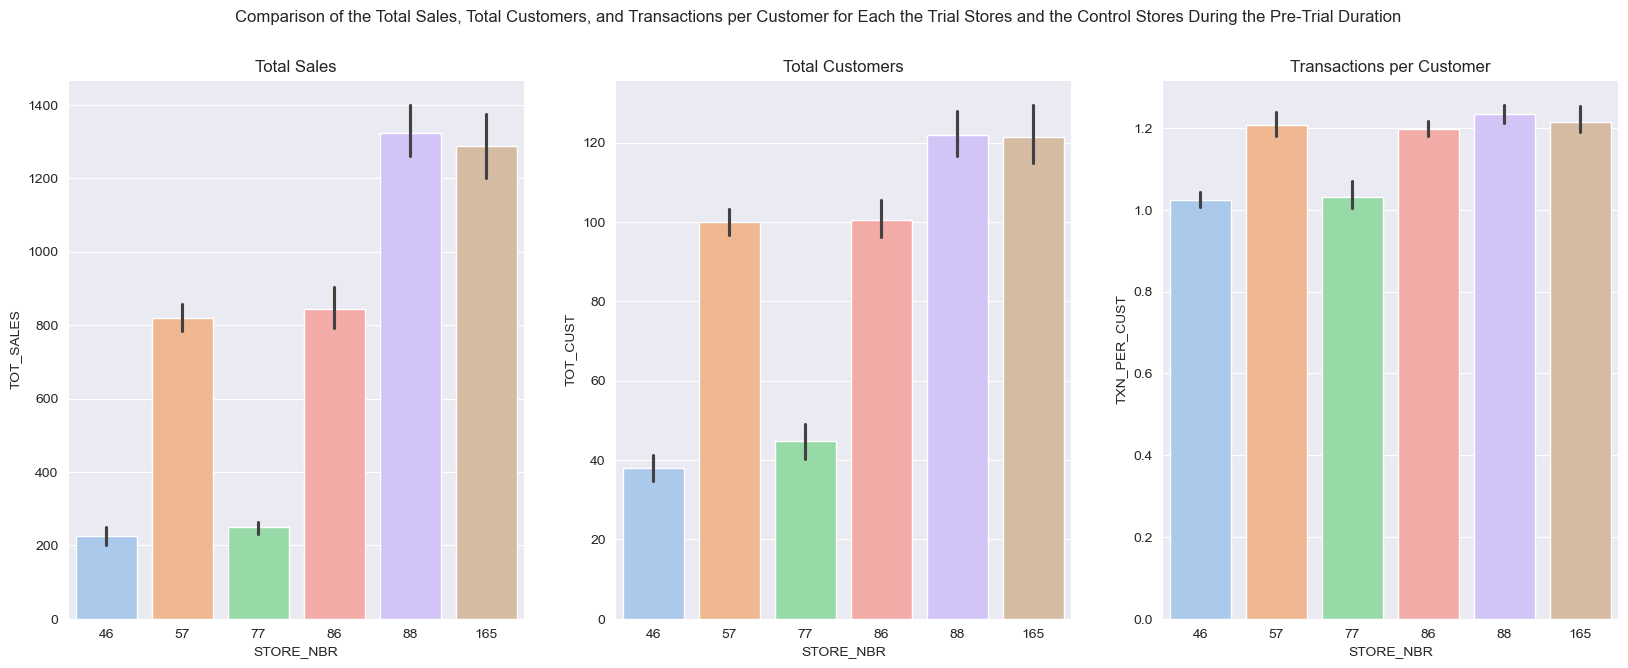

In [64]:
#   Plotting the bar graphs for the total sales, total customers, and transactions per customer for each of the trial stores and the control stores.
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.set_style("darkgrid")
figure, axis=plt.subplots(1, 3, figsize=(20, 7))
sns.barplot(x="STORE_NBR", y="TOT_SALES", data=stores, ax=axis[0], palette="pastel")
axis[0].set_title("Total Sales")
sns.barplot(x="STORE_NBR", y="TOT_CUST", data=stores, ax=axis[1], palette="pastel")
axis[1].set_title("Total Customers")
sns.barplot(x="STORE_NBR", y="TXN_PER_CUST", data=stores, ax=axis[2], palette="pastel")
axis[2].set_title("Transactions per Customer")
figure.suptitle("Comparison of the Total Sales, Total Customers, and Transactions per Customer for Each the Trial Stores and the Control Stores During the Pre-Trial Duration")
plt.show()

In [65]:
trial_data=dataframe.loc[dataframe.index.get_level_values("YEAR_MONTH")>="2019-02"]  #   Extracting the pandas.DataFrame for the trial duration.
trial_data=trial_data.reset_index()
trial_data

,STORE_NBR,YEAR_MONTH,TOT_SALES,TOT_CUST,TXN_PER_CUST
0,1,2019-02,194.7,49,1.040816
1,1,2019-03,185.2,43,1.093023
2,1,2019-04,177.4,39,1.025641
3,1,2019-05,207.1,43,1.116279
4,1,2019-06,163.6,39,1.000000
...,...,...,...,...,...
1290,272,2019-02,385.3,44,1.068182
1291,272,2019-03,421.9,48,1.062500
1292,272,2019-04,445.1,54,1.018519
1293,272,2019-05,314.6,34,1.176471


In [68]:

#   Extracting the pandas.DataFrames for each of the trial stores.

trial_stores_one=trial_data.loc[trial_data.STORE_NBR.isin([77])].reset_index()
trial_stores_two=trial_data.loc[trial_data.STORE_NBR.isin([86])].reset_index()
trial_stores_three=trial_data.loc[trial_data.STORE_NBR.isin([88])].reset_index()

In [70]:
#   Extracting the pandas.DataFrames for each of the control stores.

control_stores_one=trial_data.loc[trial_data.STORE_NBR.isin([46])].reset_index()
control_stores_two=trial_data.loc[trial_data.STORE_NBR.isin([57])].reset_index()
control_stores_three=trial_data.loc[trial_data.STORE_NBR.isin([165])].reset_index()

In [72]:
stores=pd.concat([trial_stores_one, trial_stores_two, trial_stores_three, control_stores_one, control_stores_two, control_stores_three], axis=0)    #   Concatenating all the pandas.DataFrames into one.
stores

,index,STORE_NBR,YEAR_MONTH,TOT_SALES,TOT_CUST,TXN_PER_CUST
0,360,77,2019-02,211.60,40,1.000000
1,361,77,2019-03,255.10,46,1.108696
2,362,77,2019-04,258.10,47,1.000000
3,363,77,2019-05,272.30,53,1.018868
4,364,77,2019-06,246.60,38,1.026316
0,400,86,2019-02,872.80,105,1.238095
1,401,86,2019-03,945.40,108,1.175926
2,402,86,2019-04,804.00,99,1.202020
3,403,86,2019-05,826.90,99,1.181818
4,404,86,2019-06,766.00,92,1.184783


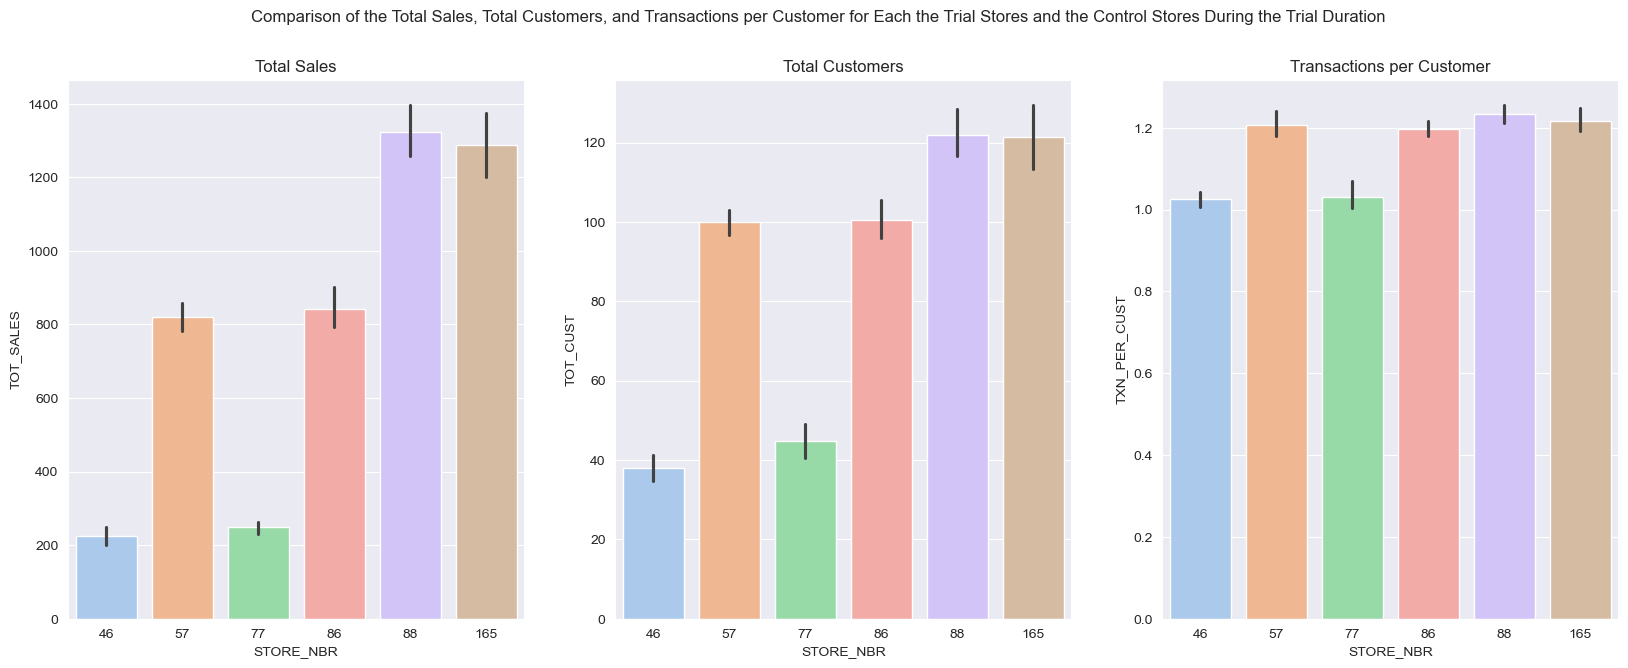

In [74]:
#   Plotting the bar graphs for the total sales, total customers, and transactions per customer for each of the trial stores and the control stores.

sns.set_style("darkgrid")
figure, axis=plt.subplots(1, 3, figsize=(20, 7))
sns.barplot(x="STORE_NBR", y="TOT_SALES", data=stores, ax=axis[0], palette="pastel")
axis[0].set_title("Total Sales")
sns.barplot(x="STORE_NBR", y="TOT_CUST", data=stores, ax=axis[1], palette="pastel")
axis[1].set_title("Total Customers")
sns.barplot(x="STORE_NBR", y="TXN_PER_CUST", data=stores, ax=axis[2], palette="pastel")
axis[2].set_title("Transactions per Customer")
figure.suptitle("Comparison of the Total Sales, Total Customers, and Transactions per Customer for Each the Trial Stores and the Control Stores During the Trial Duration")
plt.show()

While the other trial stores performed the same as their corresponding control stores, we can see, however, that STORE_NBR 88 slightly out-performed its control store, STORE_NBR 165, in all attributes.

STORE_NBR 86 and 88 show a significant difference in terms of the total sales, but this isn't the case with STORE_NBR 77, which may be because of the way the trial was implemented for it.

Due to the maximum difference in the total sales of all the trial stores, STORE_NBR 88 remains the best implementation of the trial.

The driver for the increase in total sales seems to be the purchasing customers rather than purchases per customer — the more the customers, the higher the sales.